In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier as XGBC
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
Xtrain, Ytrain, Xval, Yval = joblib.load('4c_new_bof_f120.pkl')

In [3]:
Xtrain.shape

(11199, 120)

In [4]:
Ytrain.shape

(11199,)

In [5]:
Xval.shape

(1040, 120)

In [6]:
Yval.shape

(1040,)

In [8]:
# 未调参
clf = XGBC(n_estimators=200
           ,random_state=420
           ,use_label_encoder=False
           ,eval_metric='merror'
           ,max_depth=6
           ,tree_method='gpu_hist'
           ,objective='multi:softmax'
           ,num_class=4
          )
# clf = clf.fit(Xtrain,Ytrain,eval_set=[(Xval,Yval)])
clf = clf.fit(Xtrain,Ytrain)
clf.score(Xval,Yval)

0.38846153846153847

# 最后一批新数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier as XGBC
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 数据导入

In [2]:
data_train = pd.read_csv('4c_train_last.csv', index_col=0)
data_val = pd.read_csv('4c_val_last.csv', index_col=0)
k = 150

In [3]:
Xtrain = data_train.iloc[:,:k]
Ytrain = data_train.iloc[:,-1]
Xval = data_val.iloc[:,:k]
Yval = data_val.iloc[:,-1]
X = pd.concat([Xtrain,Xval],axis=0)
Y = pd.concat([Ytrain,Yval],axis=0)

In [4]:
Xtrain.shape

(11200, 150)

In [5]:
Ytrain.shape

(11200,)

In [6]:
Xval.shape

(1040, 150)

In [7]:
Yval.shape

(1040,)

In [18]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式：shuffle表示绘图前将数据打乱

## 测试模型

In [221]:
clf = XGBC(n_estimators=560
           ,random_state=420
           ,use_label_encoder=False
           ,eval_metric='mlogloss'
           ,max_depth=5
           ,tree_method='gpu_hist'
           ,objective='multi:softmax'
           ,num_class=4
           ,subsample=1
           ,gamma=0
           ,learning_rate=0.2
           ,min_child_weight=1
           ,colsample_bytree=0.8
           ,colsample_bylevel=0.65
           ,reg_alpha=0
           ,reg_lambda=0
          )
# clf = clf.fit(Xtrain,Ytrain,eval_set=[(Xval,Yval)])
clf = clf.fit(Xtrain,Ytrain)
clf.score(Xval,Yval) 

0.6836538461538462

In [190]:
CVS(clf, Xtrain, Ytrain, cv=53).mean()

0.6777678571428571

## n_estimators

560 0.7082142857142857


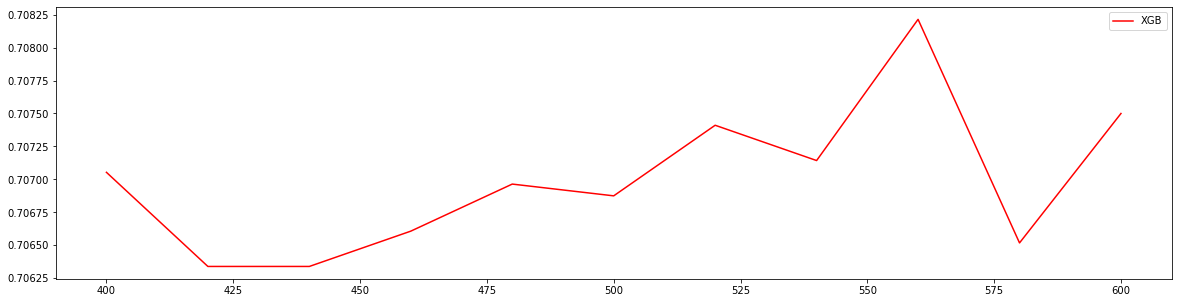

In [148]:
axisx = range(400,611,20)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=i
           ,random_state=420
           ,use_label_encoder=False
           ,eval_metric='mlogloss'
           ,max_depth=6
           ,tree_method='gpu_hist'
           ,objective='multi:softmax'
           ,num_class=4
          )
    rs.append(CVS(clf,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()
# 560 0.7082142857142857

850 0.7083035714285716 3.6639030612244855e-05
200 0.700625 2.4760841836734725e-05
850 0.7083035714285716 3.6639030612244855e-05 0.08512344547193867


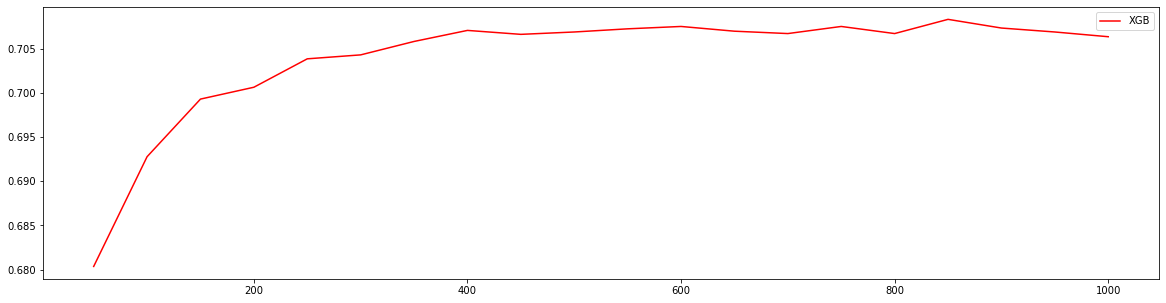

In [26]:
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    clf = XGBC(n_estimators=i
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='mlogloss'
               ,max_depth=6
               ,tree_method='gpu_hist'
               ,objective='multi:softmax'
               ,num_class=4
              )
    cvresult = CVS(clf,Xtrain,Ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

## subsample

0.7500000000000001 0.6836607142857143


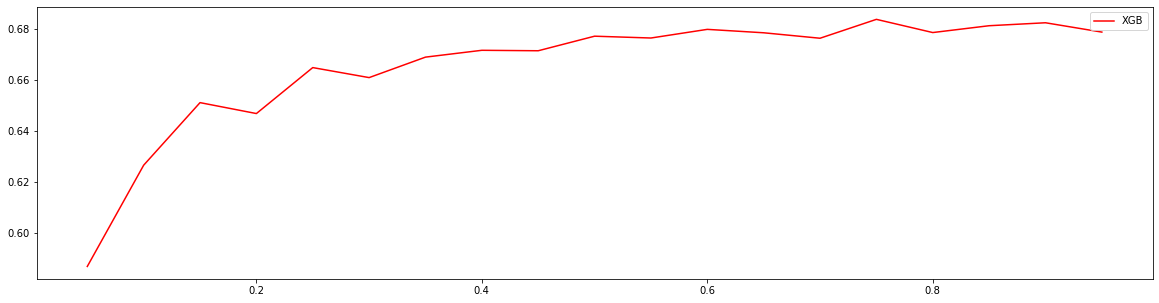

In [185]:
axisx = np.arange(0.05,1,0.05)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=560
               ,subsample=i
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='mlogloss'
               ,max_depth=5
               ,tree_method='gpu_hist'
               ,objective='multi:softmax'
               ,num_class=4
               ,learning_rate=0.25
              )
    rs.append(CVS(clf,Xtrain,Ytrain,cv=2).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()
# 0.831578947368421

## predict接口

In [109]:
ypred = clf.predict(Xval)

In [85]:
clf.predict_proba(Xval)[:10]

array([[1.2924260e-01, 8.6938518e-01, 2.2953418e-04, 1.1427285e-03],
       [9.8960602e-01, 3.1495441e-04, 9.2474427e-03, 8.3162519e-04],
       [9.9991488e-01, 6.8456386e-05, 1.6580592e-05, 1.5925345e-08],
       [9.9987912e-01, 1.0401659e-04, 1.6831542e-05, 2.1192228e-09],
       [1.0231994e-01, 1.2660409e-02, 8.6984682e-01, 1.5172841e-02],
       [3.7747952e-03, 6.6087209e-02, 2.4107811e-03, 9.2772722e-01],
       [1.8263936e-01, 6.9088370e-01, 9.6251898e-02, 3.0225094e-02],
       [9.7637957e-01, 9.1072693e-03, 1.4507141e-02, 6.0601974e-06],
       [9.9862754e-01, 9.0751064e-04, 4.6107176e-04, 3.8952176e-06],
       [9.9624348e-01, 2.6388988e-03, 1.1172916e-03, 3.8174957e-07]],
      dtype=float32)

In [110]:
y_prob = clf.predict_proba(Xval)
full_pred = []
for i in range(len(y_prob)):
    a = y_prob[i]
    full_pred.append(sorted(range(4),key=lambda k: a[k],reverse = True))

In [111]:
full_pred

[[1, 0, 3, 2],
 [0, 2, 3, 1],
 [0, 1, 2, 3],
 [0, 1, 2, 3],
 [2, 0, 3, 1],
 [3, 1, 0, 2],
 [1, 0, 2, 3],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [0, 1, 2, 3],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [0, 1, 3, 2],
 [0, 2, 1, 3],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [0, 1, 3, 2],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [0, 2, 1, 3],
 [1, 3, 0, 2],
 [1, 0, 2, 3],
 [0, 2, 1, 3],
 [1, 0, 2, 3],
 [1, 3, 2, 0],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [2, 0, 1, 3],
 [1, 0, 2, 3],
 [1, 0, 2, 3],
 [0, 2, 1, 3],
 [0, 2, 1, 3],
 [0, 1, 3, 2],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [1, 2, 0, 3],
 [0, 2, 1, 3],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [1, 0, 2, 3],
 [0, 1, 2, 3],
 [1, 2, 0, 3],
 [0, 1, 2, 3],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [1, 3, 2, 0],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [3, 1, 2, 0],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [0, 1, 2, 3],
 [0, 2, 3, 1],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [0, 2, 1,

In [112]:
count0 = 0
for i in range(260):
    for j in range(2):
        if full_pred[i][j] == 0:
            count0 += 1

In [118]:
count1 = 0
for i in range(260,520):
    for j in range(2):
        if full_pred[i][j] == 1:
            count1 += 1

In [124]:
count2 = 0
for i in range(519,780):
    for j in range(2):
        if full_pred[i][j] == 2:
            count2 += 1

In [125]:
count3 = 0
for i in range(780,1040):
    for j in range(2):
        if full_pred[i][j] == 3:
            count3 += 1

In [121]:
count0

232

In [122]:
count1

235

In [126]:
count2

211

In [127]:
count3

243

In [128]:
(232+235+211+243)/1040

0.885576923076923

In [80]:
sum(yv[:259] == 1)

185

## learning_rate

0.8 0.6932142857142857


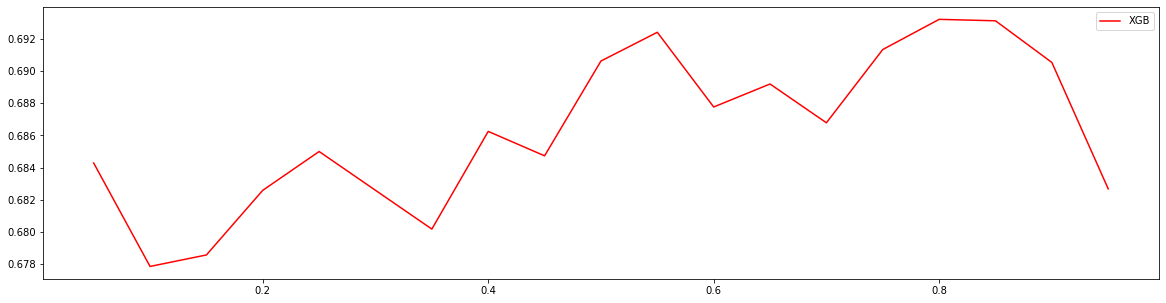

In [129]:
axisx = np.arange(0.05,1,0.05)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=560
               ,subsample=i
               ,learning_rate=i
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='mlogloss'
               ,max_depth=5
               ,tree_method='gpu_hist'
               ,objective='multi:softmax'
               ,num_class=4
              )
    rs.append(CVS(clf,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

In [ ]:
axisx = np.arange(0.05,1,0.05)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=560
               ,subsample=i
               ,learning_rate=i
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='mlogloss'
               ,max_depth=5
               ,tree_method='gpu_hist'
               ,objective='multi:softmax'
               ,num_class=4
              )
    rs.append(CVS(clf,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

## gamma

# xgb实现

In [130]:
data_train = pd.read_csv('4c_train_last.csv', index_col=0)
data_val = pd.read_csv('4c_val_last.csv', index_col=0)
k = 150

In [131]:
Xtrain = data_train.iloc[:,:k]
Ytrain = data_train.iloc[:,-1]
Xval = data_val.iloc[:,:k]
Yval = data_val.iloc[:,-1]
X = pd.concat([Xtrain,Xval],axis=0)
Y = pd.concat([Ytrain,Yval],axis=0)

In [134]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(Xtrain, label=Ytrain)
dtest = xgb.DMatrix(Xval, label=Yval)

# 设置参数
params = {'num_class': 4
          ,'objective':'multi:softmax'
          ,'eval_metric':'merror'
          ,'subsample':0.831578947368421
          ,'eta': 0.3
          ,'reg_alpha': 0.01
          ,'reg_lambda': 0.01
          ,'max_depth': 5
         }

# 训练模型
bst = xgb.train(params=params
                ,dtrain=dtrain
                ,num_boost_round=200
                ,evals=[(dtrain, 'train'), (dtest, 'dtest')]
               )

feature_score = bst.get_score(importance_type='gain') # 特征得分（特征重要性）
# print(feature_score)

[0]	train-merror:0.39991	dtest-merror:0.45096
[1]	train-merror:0.35143	dtest-merror:0.42404
[2]	train-merror:0.33071	dtest-merror:0.42596
[3]	train-merror:0.31330	dtest-merror:0.40865
[4]	train-merror:0.29946	dtest-merror:0.40288
[5]	train-merror:0.28411	dtest-merror:0.39038
[6]	train-merror:0.27286	dtest-merror:0.39615
[7]	train-merror:0.26134	dtest-merror:0.38461
[8]	train-merror:0.25071	dtest-merror:0.38846
[9]	train-merror:0.24464	dtest-merror:0.37885
[10]	train-merror:0.23688	dtest-merror:0.38365
[11]	train-merror:0.22920	dtest-merror:0.37500
[12]	train-merror:0.21937	dtest-merror:0.37500
[13]	train-merror:0.21268	dtest-merror:0.37115
[14]	train-merror:0.20393	dtest-merror:0.36539
[15]	train-merror:0.19518	dtest-merror:0.36539
[16]	train-merror:0.18929	dtest-merror:0.36539
[17]	train-merror:0.18295	dtest-merror:0.36058
[18]	train-merror:0.17411	dtest-merror:0.36058
[19]	train-merror:0.16884	dtest-merror:0.35577
[20]	train-merror:0.16232	dtest-merror:0.36058
[21]	train-merror:0.157

[173]	train-merror:0.00000	dtest-merror:0.33077
[174]	train-merror:0.00000	dtest-merror:0.33077
[175]	train-merror:0.00000	dtest-merror:0.33077
[176]	train-merror:0.00000	dtest-merror:0.33269
[177]	train-merror:0.00000	dtest-merror:0.33269
[178]	train-merror:0.00000	dtest-merror:0.33077
[179]	train-merror:0.00000	dtest-merror:0.33173
[180]	train-merror:0.00000	dtest-merror:0.33173
[181]	train-merror:0.00000	dtest-merror:0.33173
[182]	train-merror:0.00000	dtest-merror:0.33173
[183]	train-merror:0.00000	dtest-merror:0.33269
[184]	train-merror:0.00000	dtest-merror:0.32788
[185]	train-merror:0.00000	dtest-merror:0.32885
[186]	train-merror:0.00000	dtest-merror:0.33269
[187]	train-merror:0.00000	dtest-merror:0.33654
[188]	train-merror:0.00000	dtest-merror:0.33558
[189]	train-merror:0.00000	dtest-merror:0.33558
[190]	train-merror:0.00000	dtest-merror:0.33077
[191]	train-merror:0.00000	dtest-merror:0.32981
[192]	train-merror:0.00000	dtest-merror:0.32981
[193]	train-merror:0.00000	dtest-merror:

In [133]:
feature_importance = {}
for tag, score in feature_score.items():
    feature_importance[features[int(tag[1:])]] = score

plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importance)), feature_importance.values())
plt.xticks(range(len(feature_importance)), feature_importance.keys(), rotation=45)
plt.ylabel('Importance')
plt.show()

# 预测结果
result = bst.predict(
    dtest,
    ntree_limit=10
)
print('Accuracy of prediction on wine dataset:', accuracy_score(y_test, result))

NameError: name 'features' is not defined

In [ ]:
from time import time
import datetime
time0 = time()
cvresult1 = xgb.cv(params, dtrain, num_boost_round=560,nfold=5)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

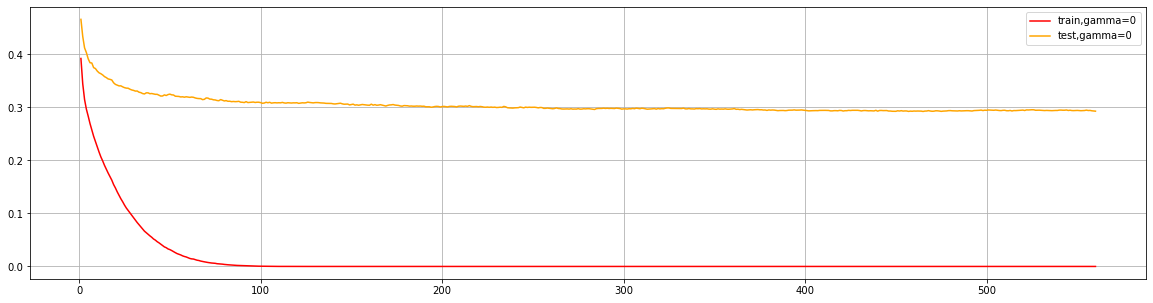

In [142]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,561),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,561),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

216.92849111557007
103.91329622268677
97.73989272117615


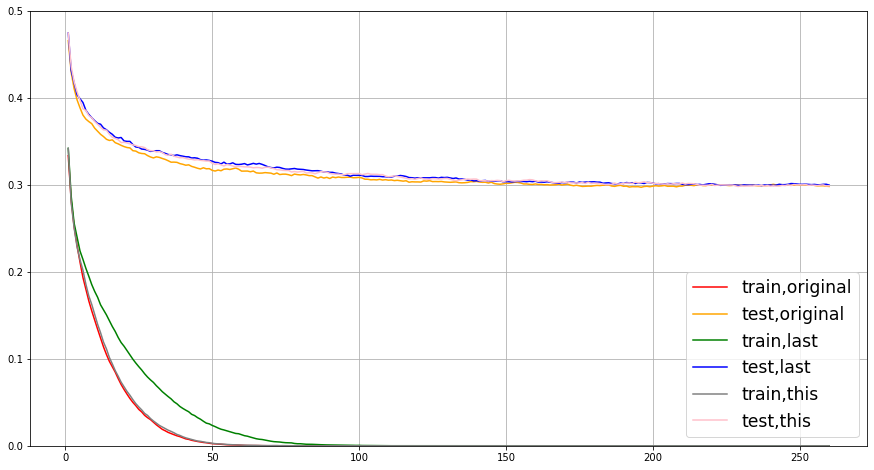

In [144]:
#原始默认参数，同上
param1 = {"objective":"multi:softmax"
          ,"num_class":4
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"eval_metric":"merror"
         }
num_round = 260
nfold = 5

time0 = time()
cvresult1 = xgb.cv(param1, dtrain, num_round, nfold)
print(time()-time0)

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=0.5)
ax.grid()
ax.plot(range(1,num_round+1),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,num_round+1),cvresult1.iloc[:,2],c="orange",label="test,original")

# 已经调参完毕的效果
param2 = {"max_depth":6
          ,"objective":"multi:softmax"
          ,"subsample":0.831578947368421
          ,"num_class":4
          ,"eta":0.15  # eta通常设定的比较小，控制迭代速度
#           ,"gamma":3.5   # 先调了max_depth，故调整gamma对模型效果影响不大
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1  # 抽样提升模型运行速度
          ,"colsample_bynode":1
          ,'eval_metric':'merror'
         }

# 正在调参的效果
param3 = {"max_depth":6
          ,"objective":"multi:softmax"
          ,"num_class":4
          ,"subsample":0.831578947368421
          ,"eta":0.25
#           ,"gamma":3.5
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,'eval_metric':'merror'
         }

time0 = time()
cvresult2 = xgb.cv(param2, dtrain, num_round)
print(time()-time0)

time0 = time()
cvresult3 = xgb.cv(param3, dtrain, num_round)
print(time()-time0)

ax.plot(range(1,num_round+1),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,num_round+1),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,num_round+1),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,num_round+1),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

# 纵坐标是mse，越小越好